In [ ]:
!nvidia-smi

Thu Jun 15 04:33:15 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   41C    P8     9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


## Install YOLOv8

⚠️ YOLOv8 is still under heavy development. Breaking changes are being introduced almost weekly. We strive to make our YOLOv8 notebooks work with the latest version of the library. Last tests took place on **18.01.2023** with version **YOLOv8.0.9**.

If you notice that our notebook behaves incorrectly - especially if you experience errors that prevent you from going through the tutorial - don't hesitate! Let us know and open an [issue](https://github.com/roboflow/notebooks/issues) on the Roboflow Notebooks repository.

YOLOv8 can be installed in two ways - from the source and via pip. This is because it is the first iteration of YOLO to have an official package.

In [ ]:
# Pip install method (recommended)

!pip install ultralytics==8.0.20

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 23.3/78.2 GB disk)


In [ ]:
from ultralytics import YOLO

from IPython.display import display, Image

## CLI Basics

If you want to train, validate or run inference on models and don't need to make any modifications to the code, using YOLO command line interface is the easiest way to get started. Read more about CLI in [Ultralytics YOLO Docs](https://v8docs.ultralytics.com/cli/).

```
yolo task=detect    mode=train    model=yolov8n.yaml      args...
          classify       predict        yolov8n-cls.yaml  args...
          segment        val            yolov8n-seg.yaml  args...
                         export         yolov8n.pt        format=onnx  args...
```

## Inference with Pre-trained COCO Model

### 💻 CLI

`yolo mode=predict` runs YOLOv8 inference on a variety of sources, downloading models automatically from the latest YOLOv8 release, and saving results to `runs/predict`.

In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model=yolov8n.pt conf=0.25 source='https://media.roboflow.com/notebooks/examples/dog.jpeg'

/content
100% 6.23M/6.23M [00:00<00:00, 88.1MB/s]

2023-06-15 04:34:02.553542: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-15 04:34:03.443206: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n summary (fused): 168 layers, 3151904 parameters, 0 gradients, 8.7 GFLOPs
100% 104k/104k [00:00<00:00, 110MB/s]
image 1/1 /content/dog.jpeg: 640x384 1 person, 1 car, 1 dog, 63.8ms
Speed: 0.8ms pre-process, 63.8ms inference, 304.5ms postprocess per image at shape (1, 3, 640, 640)


In [ ]:
# %cd {HOME}
# Image(filename='runs/detect/predict/dog.jpeg', height=600)

### 🐍 Python SDK

The simplest way of simply using YOLOv8 directly in a Python environment.

In [ ]:
model = YOLO(f'{HOME}/yolov8n.pt')
results = model.predict(source='https://media.roboflow.com/notebooks/examples/dog.jpeg', conf=0.25)

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n summary (fused): 168 layers, 3151904 parameters, 0 gradients, 8.7 GFLOPs
Found https://media.roboflow.com/notebooks/examples/dog.jpeg locally at dog.jpeg


In [ ]:
results[0].boxes.xyxy

tensor([[   0.,  314.,  625., 1278.],
        [  55.,  250.,  648., 1266.],
        [ 633.,  720.,  701.,  786.]], device='cuda:0')

In [ ]:
results[0].boxes.conf

tensor([0.72713, 0.29066, 0.28456], device='cuda:0')

In [ ]:
results[0].boxes.cls

tensor([ 0., 16.,  2.], device='cuda:0')

## Custom Training

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/YOLOv8

/content/drive/MyDrive/YOLOv8


In [ ]:
!ls runs/detect/train/

args.yaml  weights


In [ ]:
%cd /content/drive/MyDrive/YOLOv8

!yolo task=detect mode=train model=yolov8l.pt data= data.yaml epochs=25 imgsz=224 plots=True

/content/drive/MyDrive/YOLOv8
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8l.yaml, data=data.yaml, epochs=25, patience=50, batch=16, imgsz=224, save=True, cache=False, device=, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=False, val=True, save_json=False, save_hybrid=False, conf=0.001, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=ultralytics/assets/, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=False, int8=False, dynamic=False, simpl

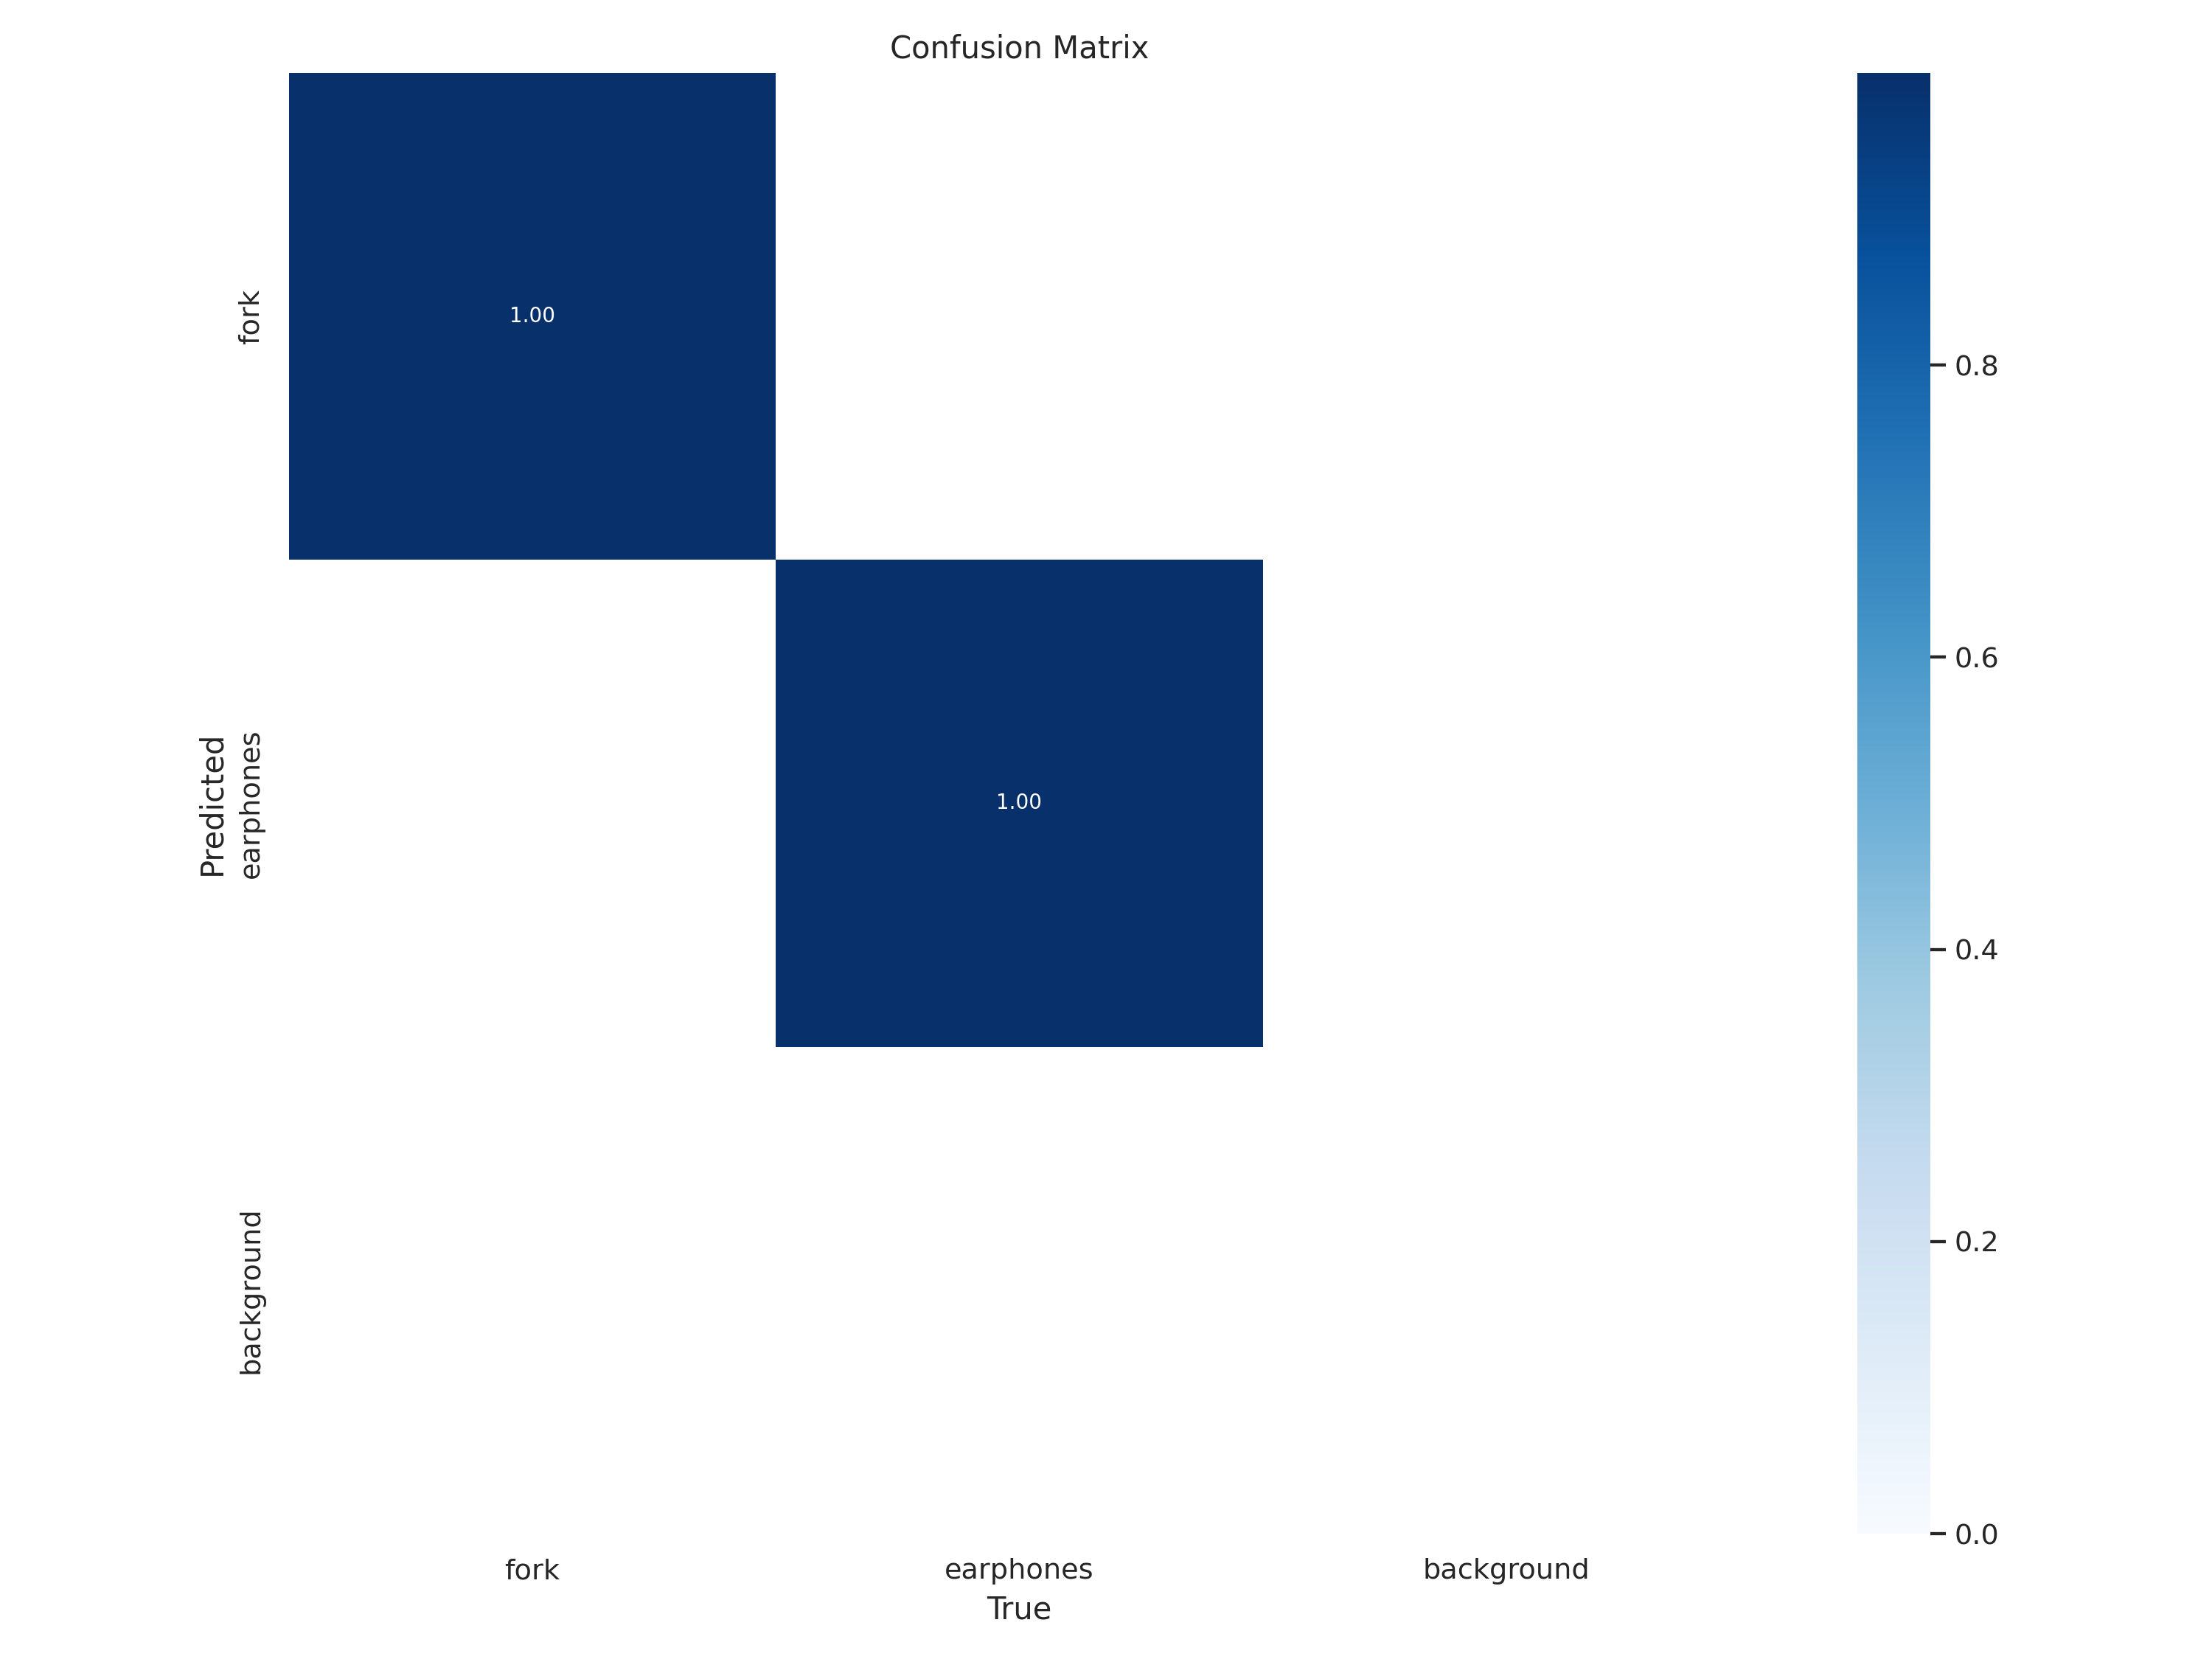

In [ ]:
Image(filename='runs/detect/train5/confusion_matrix.png', width=600)

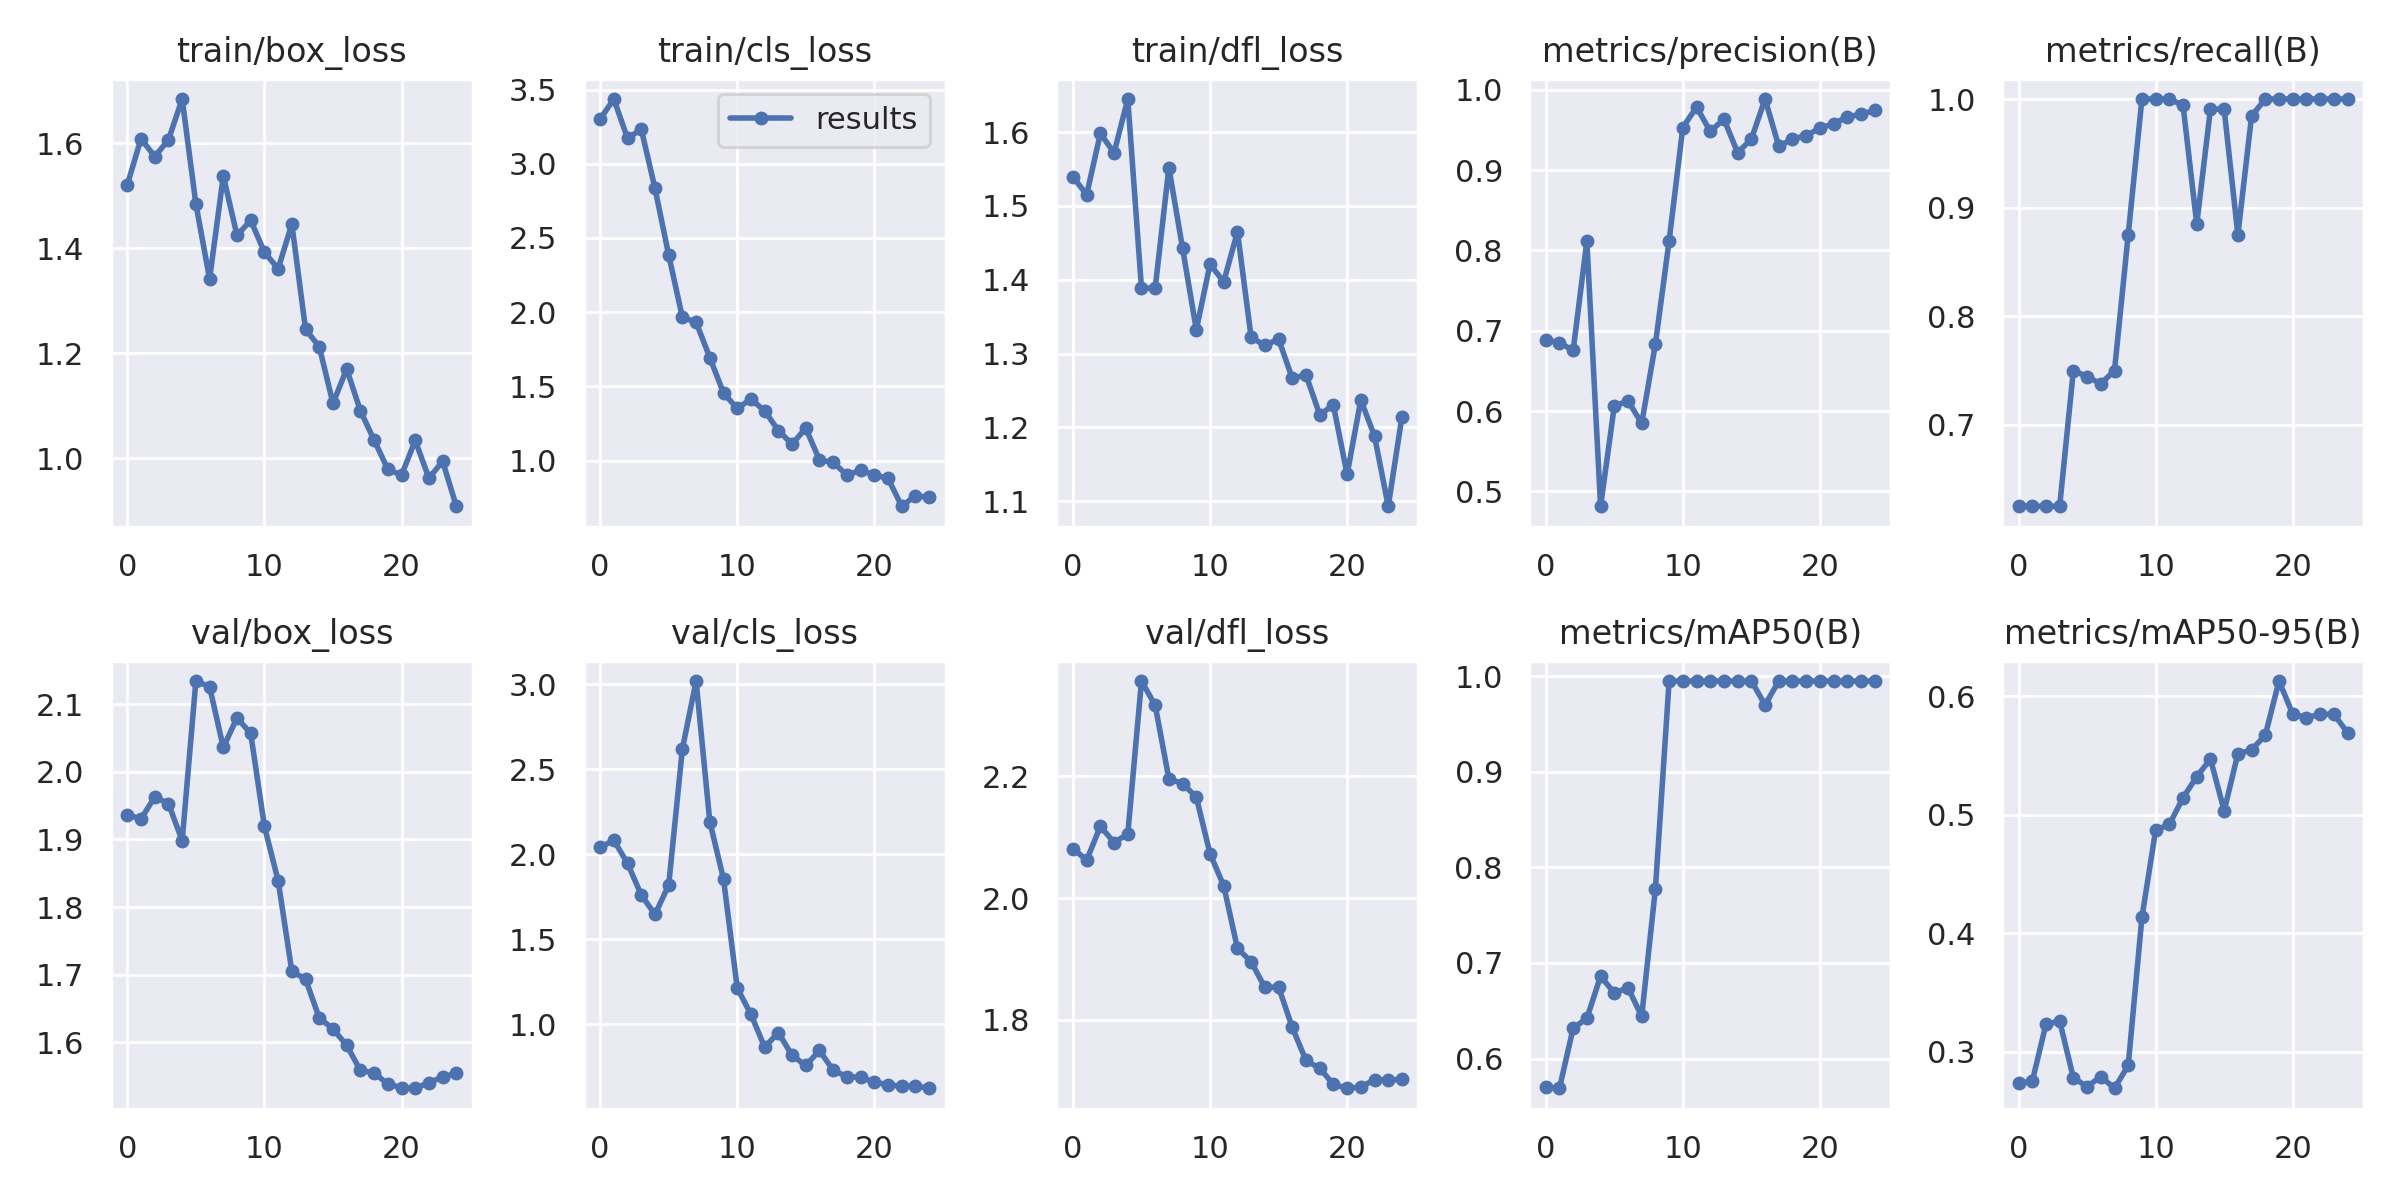

In [ ]:
Image(filename='runs/detect/train5/results.png', width=600)

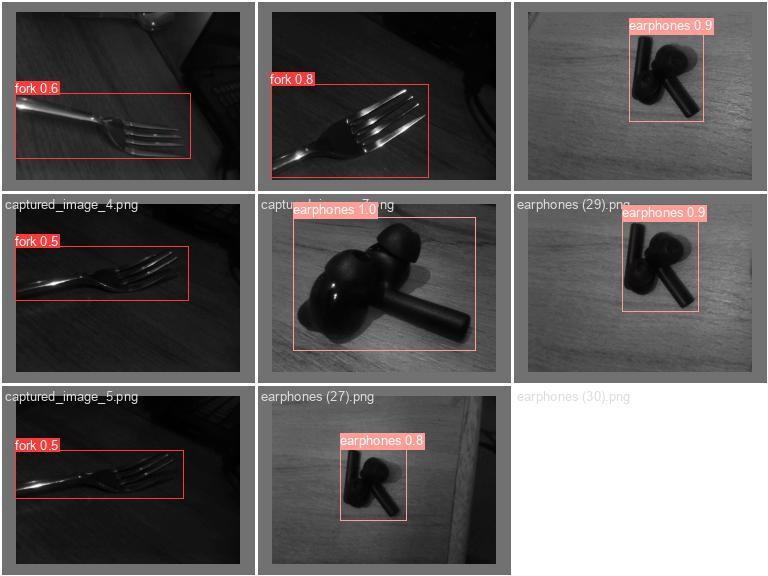

In [ ]:
Image(filename='runs/detect/train5/val_batch0_pred.jpg', width=600)

## Validate Custom Model

In [ ]:
!yolo task=detect mode=val model=runs/detect/train5/weights/best.pt data=data.yaml

2023-06-12 12:39:29.370150: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-12 12:39:30.245857: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43608150 parameters, 0 gradients, 164.8 GFLOPs
val: Scanning /content/drive/MyDrive/YOLOv8/data/valid/labels.cache... 8 images, 0 backgrounds, 0 corrupt: 100% 8/8 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 1/1 [00:00<00:00,  1.56it/s]
                   all          8          8      0.943          1      0.995      0.613
                  fork          8          4     

## Inference with Custom Model

In [ ]:

!yolo task=detect mode=predict model=runs/detect/train5/weights/best.pt name=test_labeled/images source=/content/drive/MyDrive/YOLOv8/data/test/images save=True


2023-06-12 12:39:49.032344: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-12 12:39:49.878658: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43608150 parameters, 0 gradients, 164.8 GFLOPs
image 1/8 /content/drive/MyDrive/YOLOv8/data/test/images/captured_image_0.png: 192x224 2 forks, 58.3ms
image 2/8 /content/drive/MyDrive/YOLOv8/data/test/images/captured_image_1.png: 192x224 1 fork, 18.8ms
image 3/8 /content/drive/MyDrive/YOLOv8/data/test/images/captured_image_2.png: 192x224 1 fork, 18.7ms
image 4/8 /content/drive/MyDrive/YOLOv8/data/test/images/captured_image_3.png: 192x224 1

**NOTE:** Let's take a look at few results.

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob('/content/drive/MyDrive/YOLOv8/runs/detect/test_labeled/images2/*.jpg'):
      print(Image(filename=image_path, width=600))
      print("\n")

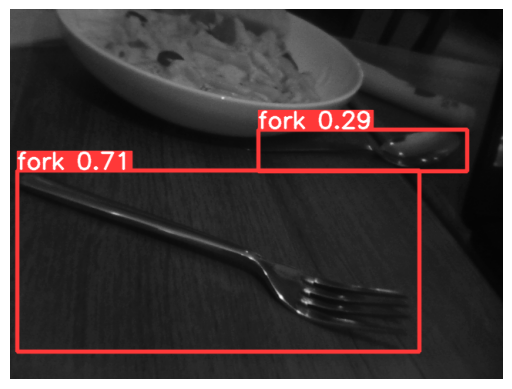

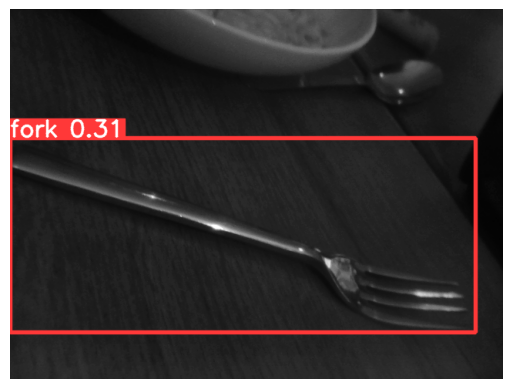

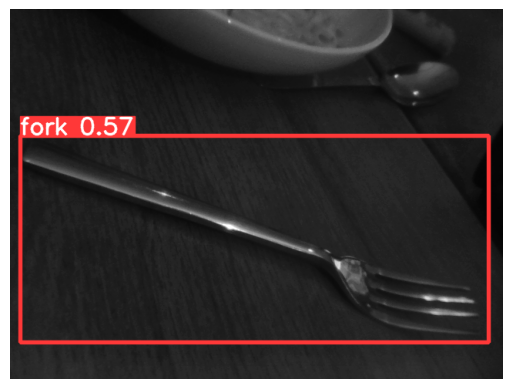

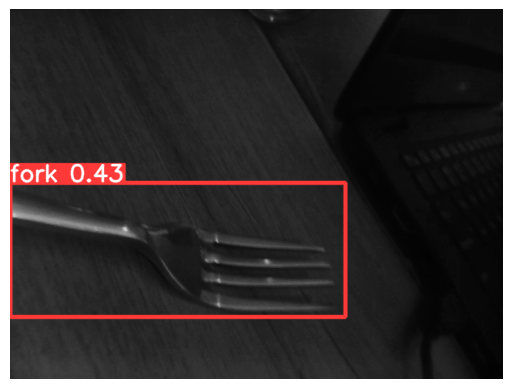

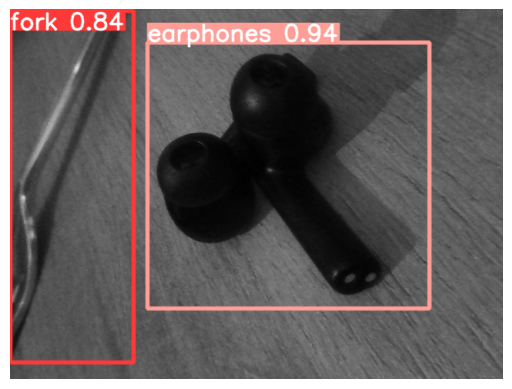

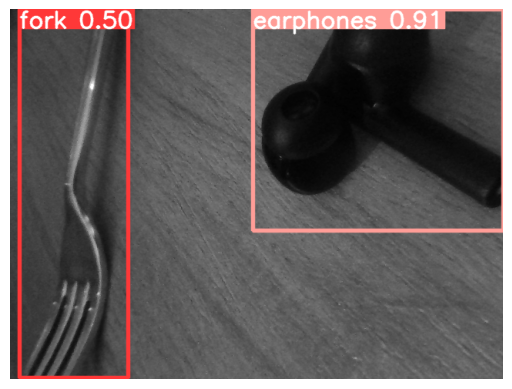

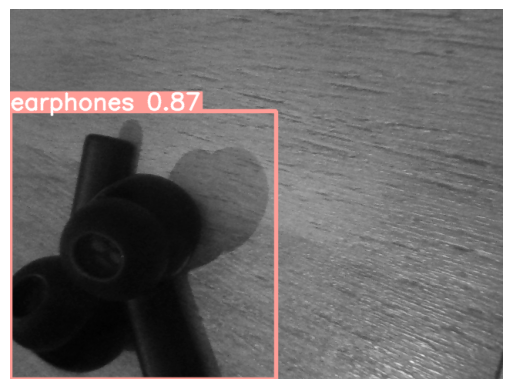

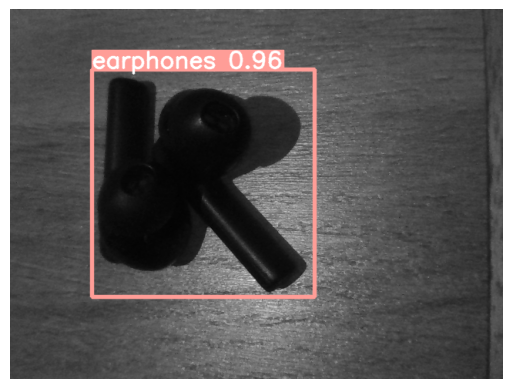

In [ ]:
import os
from PIL import Image
import matplotlib.pyplot as plt

# Specify the folder path where the images are located
folder_path = "/content/drive/MyDrive/YOLOv8/runs/detect/test_labeled/images2/"

# Get a list of all files in the folder
file_list = os.listdir(folder_path)

# Filter out non-image files (optional)
image_list = [file for file in file_list if file.endswith(('.jpg', '.jpeg', '.png'))]

# Loop through each image file and display it
for image_file in image_list:
    # Create the file path
    file_path = os.path.join(folder_path, image_file)

    # Open the image file using PIL
    image = Image.open(file_path)

    # Display the image using Matplotlib
    plt.imshow(image)
    plt.axis('off')
    plt.show()
